In [106]:
import numpy as np
import re
import pandas as pd
from scipy.optimize import minimize, differential_evolution
from scipy.spatial.distance import cosine
from math import sin, cos, exp
import matplotlib.pyplot as plt

# HW_1

In [2]:
f = open('sentences.txt')
lines = f.readlines()
for line in lines:
    print(line)

In comparison to dogs, cats have not undergone major changes during the domestication process.

As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.

A common interactive use of cat for a single file is to output the content of a file to standard output.

Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.

In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.

Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).

However, if the output is piped or redirected, cat is unnecessary.

cat with one named file is safer where human error is a concern - one wrong us

In [3]:
for i in range(len(lines)):
    lines[i] = lines[i].lower()
    print(lines[i])

in comparison to dogs, cats have not undergone major changes during the domestication process.

as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.

a common interactive use of cat for a single file is to output the content of a file to standard output.

cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.

in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.

domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).

however, if the output is piped or redirected, cat is unnecessary.

cat with one named file is safer where human error is a concern - one wrong us

In [4]:
for i in range(len(lines)):
    lines[i] = [word for word in re.split('[^a-z]', lines[i]) if len(word)>0]
print(lines[0])

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']


In [5]:
text = []
for line in lines:
    text += line
text

['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process',
 'as',
 'cat',
 'simply',
 'catenates',
 'streams',
 'of',
 'bytes',
 'it',
 'can',
 'be',
 'also',
 'used',
 'to',
 'concatenate',
 'binary',
 'files',
 'where',
 'it',
 'will',
 'just',
 'concatenate',
 'sequence',
 'of',
 'bytes',
 'a',
 'common',
 'interactive',
 'use',
 'of',
 'cat',
 'for',
 'a',
 'single',
 'file',
 'is',
 'to',
 'output',
 'the',
 'content',
 'of',
 'a',
 'file',
 'to',
 'standard',
 'output',
 'cats',
 'can',
 'hear',
 'sounds',
 'too',
 'faint',
 'or',
 'too',
 'high',
 'in',
 'frequency',
 'for',
 'human',
 'ears',
 'such',
 'as',
 'those',
 'made',
 'by',
 'mice',
 'and',
 'other',
 'small',
 'animals',
 'in',
 'one',
 'people',
 'deliberately',
 'tamed',
 'cats',
 'in',
 'a',
 'process',
 'of',
 'artificial',
 'selection',
 'as',
 'they',
 'were',
 'useful',
 'predators',
 'of',
 'vermin',
 'the',
 'domesticat

In [6]:
unique = list(set(text))

In [7]:
df = pd.DataFrame(columns = list(set(text)))
df

,catenates,clear,no,output,community,non,legibility,are,dogs,incremental,...,used,read,released,new,to,the,lion,since,installed,two


In [8]:
for i in lines:
    d = {}
    for j in unique:
        count = 0
        for k in i:
            if j == k:
                count += 1
        d[j] = count
    df = df.append(d, ignore_index=True)

In [9]:
df

,catenates,clear,no,output,community,non,legibility,are,dogs,incremental,...,used,read,released,new,to,the,lion,since,installed,two
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
df['Range'] = df.apply(lambda x: cosine(list(df.loc[0,:]), list(x)), axis = 1)

In [11]:
df['Range'].sort_values(ascending = True)

0     0.000000
6     0.732739
4     0.777089
21    0.825036
10    0.832817
12    0.839643
16    0.840636
20    0.842757
2     0.864474
13    0.870359
14    0.874012
11    0.880477
8     0.884272
19    0.888544
3     0.895172
9     0.905509
7     0.925875
5     0.940239
15    0.944272
18    0.944272
1     0.952754
17    0.956645
Name: Range, dtype: float64

In [55]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [56]:
A = np.array([np.ones(2),np.linspace(1,15,2)])
A = A.T
A

array([[ 1.,  1.],
       [ 1., 15.]])

In [61]:
b = f(A[:,1])
b

array([3.25221687, 0.63522142])

In [62]:
x = np.linalg.solve(A, b)
x

array([ 3.43914511, -0.18692825])

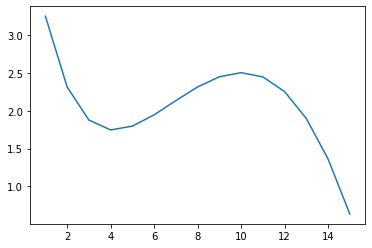

In [69]:
plt.plot(np.arange(1.0,16.0),f(np.arange(1.0,16.0)))
plt.show()

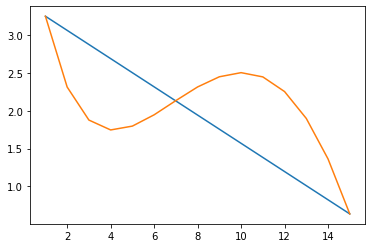

In [71]:
plt.plot(A[:,1],b)
plt.plot(np.arange(1.0,16.0),f(np.arange(1.0,16.0)))
plt.show()

In [89]:
A_ = np.array([np.ones(3),[1,8,15],[1, 8**2, 15**2] ])
A_ = A_.T
A_

array([[  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,  15., 225.]])

In [90]:
b_ = f(A_[:,1])
b_ = b_.T
b_

array([3.25221687, 2.31617016, 0.63522142])

In [91]:
x = np.linalg.solve(A_, b_.T)
x

array([ 3.32512949, -0.06531159, -0.00760104])

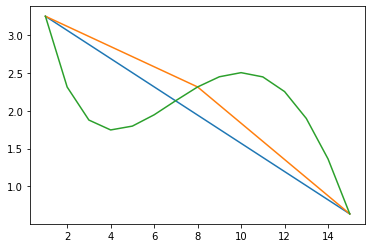

In [92]:
plt.plot(A[:,1],b)
plt.plot(A_[:,1],b_)
plt.plot(np.arange(1.0,16.0),f(np.arange(1.0,16.0)))
plt.show()

In [97]:
A_1 = np.array([np.ones(4),[1,4,10,15],[1,4**2,10**2,15**2],[1,4**3,10**3,15**3]])
A_1 = A_1.T
A_1

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03]])

In [98]:
b_1 = f(A_1[:,1])
b_1 = b_1.T
b_1

array([3.25221687, 1.74684595, 2.50541641, 0.63522142])

In [99]:
x = np.linalg.solve(A_1, b_1.T)
x

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

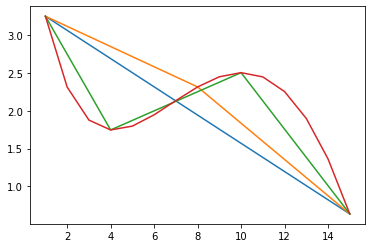

In [100]:
plt.plot(A[:,1],b)
plt.plot(A_[:,1],b_)
plt.plot(A_1[:,1],b_1)
plt.plot(np.arange(1.0,16.0),f(np.arange(1.0,16.0)))
plt.show()

# HW_2

In [117]:
import numpy as np
import re
import pandas as pd
from scipy.optimize import minimize, differential_evolution
from scipy.spatial.distance import cosine
from math import sin, cos, exp
import matplotlib.pyplot as plt

## EX1

In [101]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [112]:
minimize(f, np.array([15]))

      fun: -11.503580741169603
 hess_inv: array([[49.07083657]])
      jac: array([-0.6282866])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 44
      nit: 1
     njev: 19
   status: 2
  success: False
        x: array([24.67766107])

In [114]:
minimize(f, np.array([2]),method = 'BFGS')

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

In [115]:
f(4.13627619)

1.745268290344923

In [116]:
minimize(f, np.array([30]),method = 'BFGS')

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

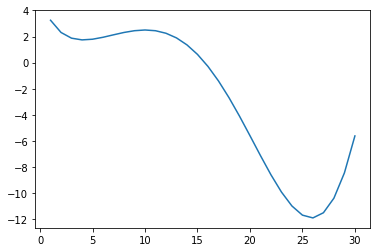

In [109]:
plt.plot(np.arange(1.0,31.0),f(np.arange(1.0,31.0)))
plt.show()

## EX 2

In [118]:
differential_evolution(f, [(1,30)])

     fun: array([-11.89889467])
     jac: array([-1.77635669e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019284])

## EX 3

In [122]:
def h(x):
    return f(x).astype(int)

In [123]:
np.arange(1.0,31.0,1.0)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.])

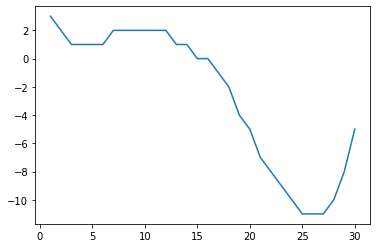

In [124]:
plt.plot(np.arange(1.0,31.0,1.0),h(np.arange(1.0,31.0,1.0)))

In [125]:
minimize(h, 30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [126]:
differential_evolution(h, [(1,30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([25.68881339])